# A tutorial for running a flood simulation

This tutorial is written as a Jupyter notebook and provides a step-by-step tutorial for setting up a landslide model. 

Author: [Xiaoli Su](https://scholar.google.com/citations?user=Sy0T-K8AAAAJ&hl=en)

Date: 11/09/2022

## Compilation 
The code compilation is executed as follows.

1. Create a “build” folder in the directory of '/***/HiPIMS_CUDA_Landslide'

2. Enter into “build” folder 

3. Execute the command 'cmake -D CUDA_TOOLKIT_ROOT_DIR=/usr/local/cuda-11-2 ..' in the terminal 

4. Execute the command 'make' in the terminal

## Crteating input files 

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
@File    :   landslide.ipynb
@Time    :   2023/09/12 11:39:00
@Author  :   Xiaoli Su 
@Email   :   x.su@lboro.ac.uk
@Description   : 
To do:
'''

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

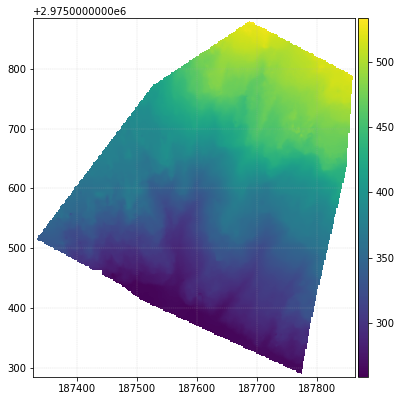

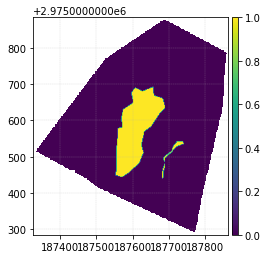

In [1]:
import hipims_io as hpio
import numpy as np
import os
import pandas as pd
import itertools
from shutil import copy

# Load DEM and initial depth files into a Raster object and plot the Raser object
# the initial depth indicates the geomaterial depth in the unstable area

CASE_PATH = os.path.join(os.getcwd()) 
data_prep = os.path.join(CASE_PATH, 'data_prep')
IO_Path = os.path.join(CASE_PATH, 'IO')
if not os.path.isdir(IO_Path):
        os.mkdir(IO_Path)

DEM_name = os.path.join(data_prep, 'DEM.tif')
ini_depth_name =  os.path.join(data_prep, 'ini_depth.tif')

DEM = hpio.Raster(source_file=DEM_name)
DEM.mapshow(figsize=(6, 8), dpi=300)

ini_depth = hpio.Raster(source_file=ini_depth_name)
ini_depth.mapshow()

In [3]:
# generate input files for the model simulation

case_input = hpio.InputHipims(DEM, num_of_sections=1, case_folder=IO_Path)
case_input.set_device_no(1)

m = 0.02 # Manning coefficient
case_input.set_grid_parameter(manning=m)

case_input.set_boundary_condition(outline_boundary = 'fall')
case_input.set_initial_condition('h0', ini_depth.array) 

# 0-start time, 86400-end time, 1800-output intervel time, 86400-backup interval time
case_input.set_runtime([0, 86400, 1800, 86400])

case_input.get_data_folders()
case_input.write_input_files()


/media/data/lunet/cvxs2/HiPIMS_CUDA_Landslide/LandslideSimulationExample/IO/input/mesh/DEM.txt created
times_setup.dat created
device_setup.dat created
z created
h created
hU created
precipitation created
manning created
sewer_sink created
cumulative_depth created
hydraulic_conductivity created
capillary_head created
water_content_diff created
precipitation_mask created
precipitation_source_all.dat created
boundary condition files created
gauges_pos.dat created


## run the simulation 

1. enter into '/***/HiPIMS_CUDA_Landslide/LandslideSimulationTutorial/IO' folder

2. exexute the command '/***/HiPIMS_CUDA_Landslide/release/bin/cudaLandslidesSolver' in the terminal